# Exploratory Data Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Dataset Loading and Feature Analysis

In [2]:
# Load the training and testing datasets
train_data = pd.read_csv('Google_Stock_Price_Train.csv')
test_data = pd.read_csv('Google_Stock_Price_Test.csv')

In [3]:
# Display the first five rows of the train dataset
print("First 5 rows of the training dataset:")
train_data.head()

First 5 rows of the training dataset:


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
# Display the first five rows of the test dataset
print("\nFirst 5 rows of the test dataset:")
test_data.head()


First 5 rows of the test dataset:


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [5]:
# Display the shape of the train data
train_data.shape

(1258, 6)

In [6]:
# Display the shape of the test data
test_data.shape

(20, 6)

In [7]:
# Describe the train data values
train_data.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [8]:
# Describe the test data values
test_data.describe()

,Open,High,Low,Close
count,20.000000,20.000000,20.000000,20.000000
mean,807.526000,811.926500,801.949500,807.904500
std,15.125428,14.381198,13.278607,13.210088
min,778.810000,789.630000,775.800000,786.140000
25%,802.965000,806.735000,797.427500,802.282500
50%,806.995000,808.640000,801.530000,806.110000
75%,809.560000,817.097500,804.477500,810.760000
max,837.810000,841.950000,827.010000,835.670000


In [9]:
# Check for missing values in both datasets
print("\nChecking for missing values in training dataset:")
print(train_data.isnull().sum())

print("\nChecking for missing values in test dataset:")
print(test_data.isnull().sum())


Checking for missing values in training dataset:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Checking for missing values in test dataset:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [10]:
# Convert columns to numeric by removing commas explicitly
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    # Convert to string, remove commas, and convert to float
    train_data[col] = train_data[col].astype(str).str.replace(',', '').astype(float)
    test_data[col] = test_data[col].astype(str).str.replace(',', '').astype(float)

# Convert 'Date' column to datetime format for better plotting
train_data['Date'] = pd.to_datetime(train_data['Date'], format='%m/%d/%Y')
test_data['Date'] = pd.to_datetime(test_data['Date'], format='%m/%d/%Y')

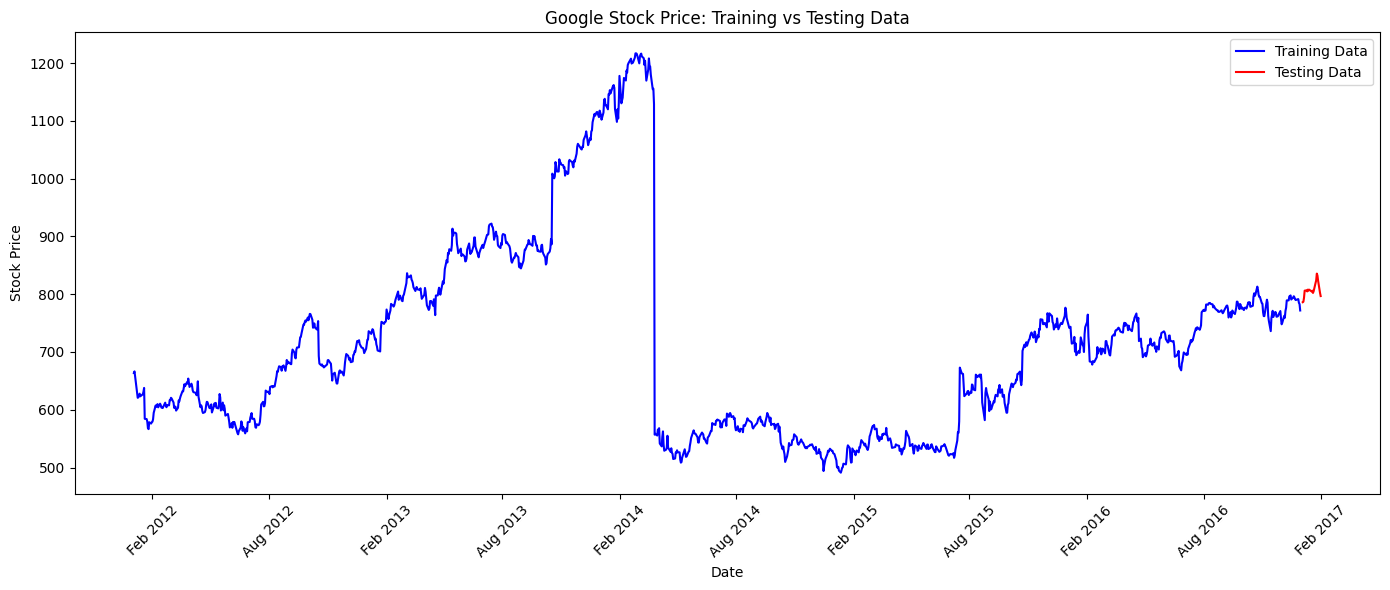

In [11]:
# Plotting the training and testing dataset
plt.figure(figsize=(14, 6))
plt.plot(train_data['Date'], train_data['Close'], label='Training Data', color='b')
plt.plot(test_data['Date'], test_data['Close'], label='Testing Data', color='r')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Google Stock Price: Training vs Testing Data')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set x-ticks every 6 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis with Month and Year
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

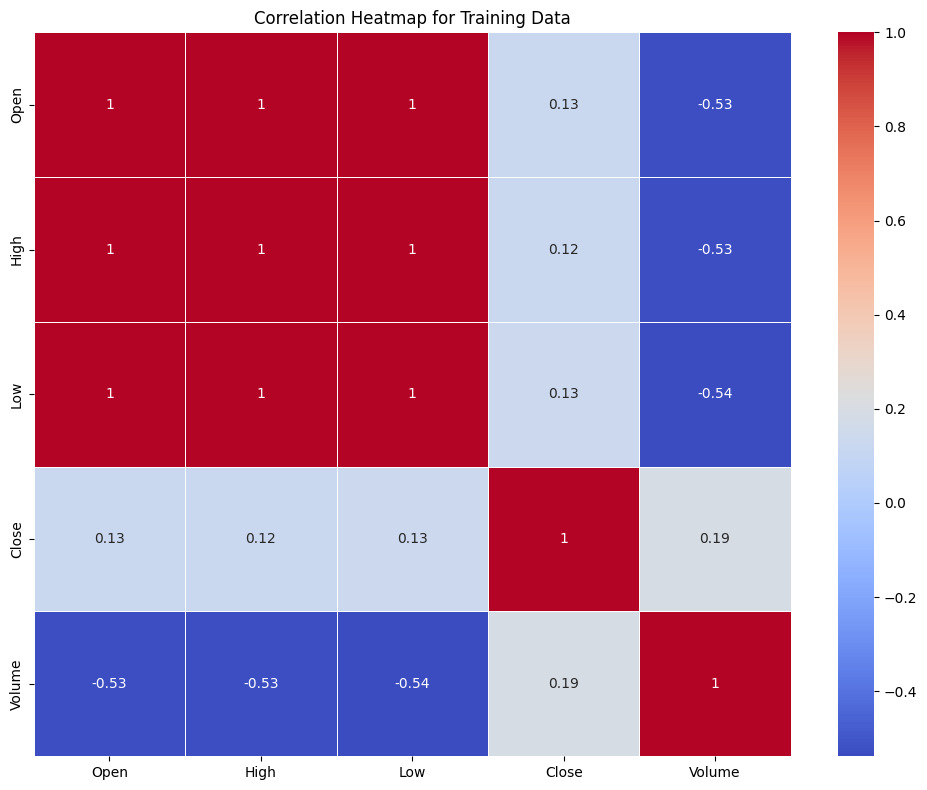

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = train_data.drop(columns=['Date']).corr()  # Drop the 'Date' column for correlation calculation
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Training Data')
plt.tight_layout()
plt.show()

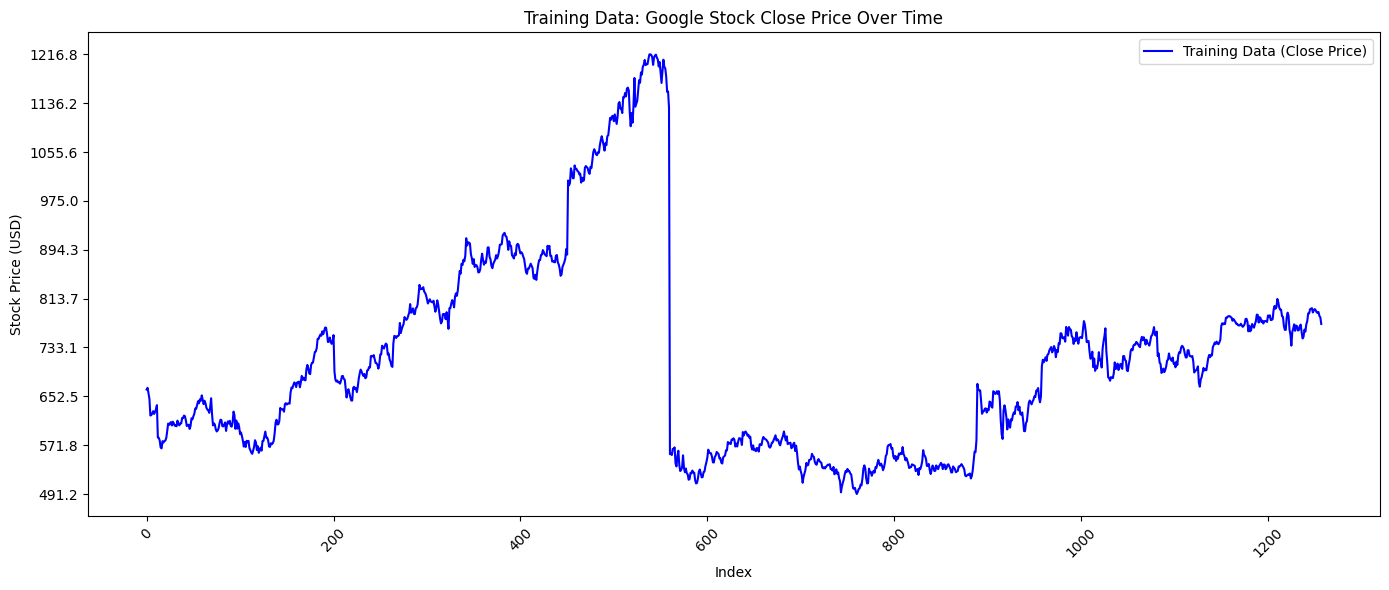

In [13]:
# Plot for Google Stock Close Price (Training)
plt.figure(figsize=(14, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data (Close Price)', color='b')
plt.xlabel('Index')
plt.ylabel('Stock Price (USD)')
plt.title('Training Data: Google Stock Close Price Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(np.linspace(train_data['Close'].min(), train_data['Close'].max(), 10))  # Reduce number of y-axis ticks
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

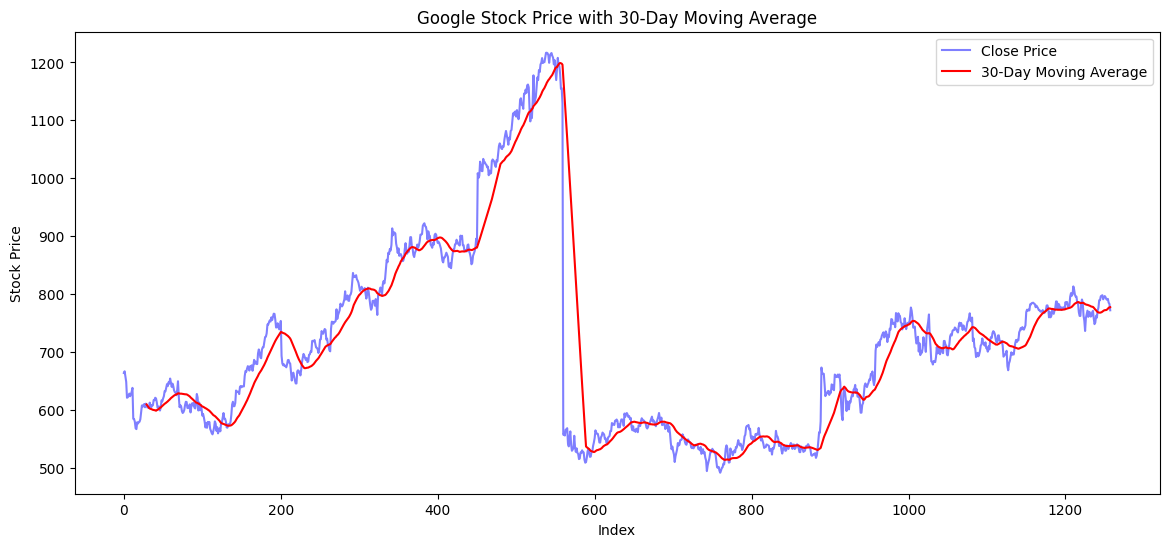

In [14]:
# Plot Moving Average of Closing Price
rolling_window = 30
plt.figure(figsize=(14, 6))
train_data['Close'].plot(label='Close Price', color='blue', alpha=0.5)
train_data['Close'].rolling(window=rolling_window).mean().plot(label=f'{rolling_window}-Day Moving Average', color='red')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.title('Google Stock Price with 30-Day Moving Average')
plt.legend()
plt.show()

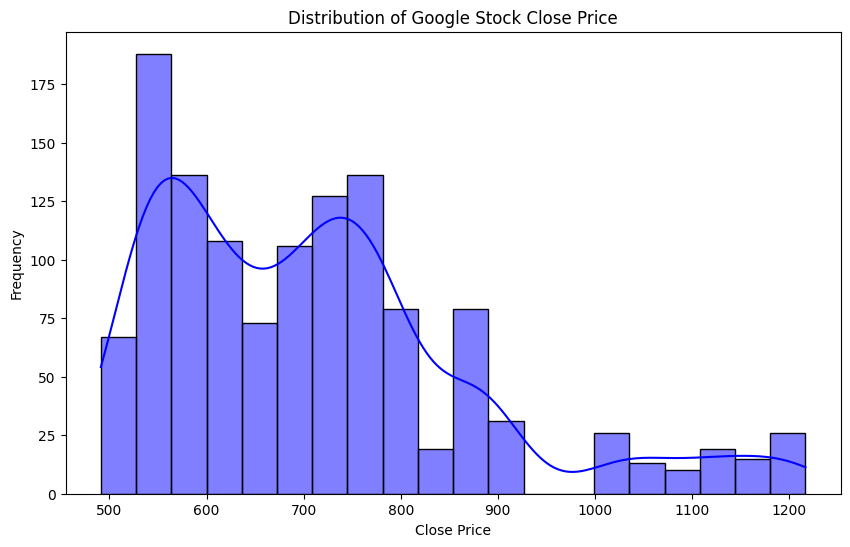

In [15]:
# Plot Distribution of Closing Price
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Close'], kde=True, color='blue')
plt.title('Distribution of Google Stock Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

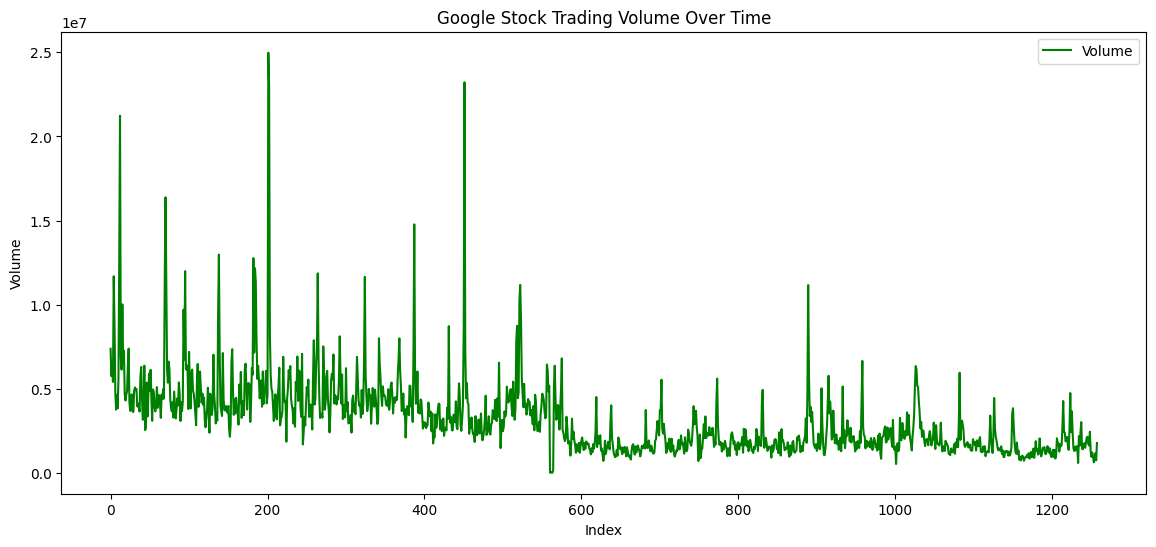

In [16]:
# Plot Volume over Time to Analyze Peaks
plt.figure(figsize=(14, 6))
plt.plot(train_data.index, train_data['Volume'], label='Volume', color='green')
plt.xlabel('Index')
plt.ylabel('Volume')
plt.title('Google Stock Trading Volume Over Time')
plt.legend()
plt.show()

## Analysis of Output

### Data Insights
- The dataset looks clean and there are no missing values
- The columns include Date, Open, High, Low, Close, and Volume
- The Close price is the one we are interested in predicting
- There seemed to be mixed types of values which were uniformly converted to int
- We can drop the Date column later as it is not important towards our prediction